# Домашнее задание

Всего у вас 2 домашних задания:

### 1) Бинарная классификация на примере детекции фрода на кредитных картах (6 баллов)
(в этом файле)

### 2) Небинарная классификация на вашем датасете (6 баллов)
(тоже в этом файле)

# 1 - Бинарная классификация на примере детекции фрода на кредитных картах (суммарно 6 баллов)
У вас есть информация о множесте транзакций. Вам нужно научиться предсказывать, какие из них мошеннические, а какие нет.

### (1 балл) Считайте данные
Сами считайте и предобработайте, если надо, данные из файла creditcard.csv

In [ ]:
# !wget  -O 'creditcard.csv' -q 'https://www.kaggle.com/mlg-ulb/creditcardfraud#creditcard.csv?dl=0'

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
import plotly.graph_objs as go
import plotly.express as px
from plotly.subplots import make_subplots

In [2]:
df = pd.read_csv("creditcard.zip")

In [3]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [4]:
df.tail()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0
284806,172792.0,-0.533413,-0.189733,0.703337,-0.506271,-0.012546,-0.649617,1.577006,-0.414650,0.486180,...,0.261057,0.643078,0.376777,0.008797,-0.473649,-0.818267,-0.002415,0.013649,217.00,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [6]:
df.dtypes[20:]

V20       float64
V21       float64
V22       float64
V23       float64
V24       float64
V25       float64
V26       float64
V27       float64
V28       float64
Amount    float64
Class       int64
dtype: object

In [7]:
df.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

In [8]:
df.isna().sum().sum()

0

**Пропусков в данных нет, красота**

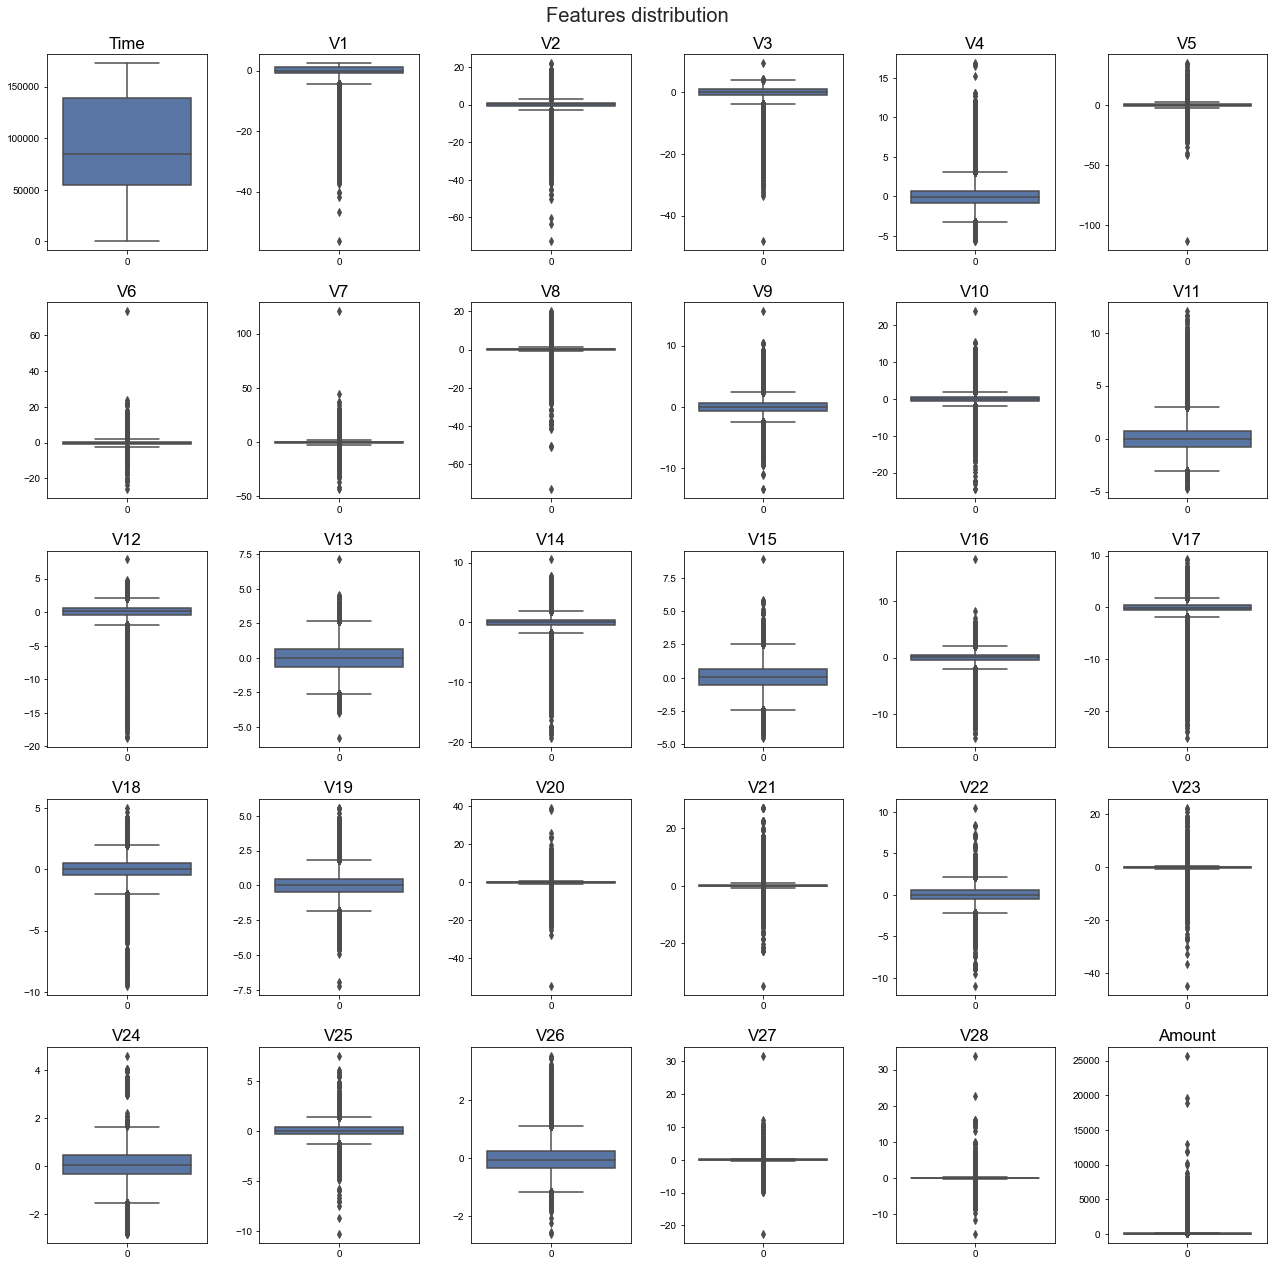

In [9]:
fig, axes = plt.subplots(5, 6, figsize=(18, 18), tight_layout=True)
sns.set(style="whitegrid", font_scale=1.4)
fig.suptitle('Features distribution')
num_col = 0
num_row = 0
for i in range(30):
    sns.boxplot(ax=axes[num_row, num_col], data=df[df.columns[i]])
    axes[num_row, num_col].set_title(df.columns[i])
    num_col += 1
    if num_col == 6:
        num_row += 1
        num_col = 0

**Выбросов – моё почтение**

In [10]:
names = ["Not fraud", "Fraud"]
px.pie(df, values=df['Class'].value_counts(), names=names, title='Distribution of target value')

**Классы *слегка* несбалансированы, долю правильных ответов в качестве целевой метрики использовать нельзя**

### (2 балла) Обучите несколько моделей, посмотрите на метрики.
Как модели точно возьмите LogisticRegression, KNN и константу, можете придумать еще какие-нибудь.

Как метрики точно возьмите accuracy, precision, recall, f1, roc_auc. Постройте ROC-кривую.

In [11]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import LinearSVC
from sklearn.metrics import classification_report, roc_auc_score, RocCurveDisplay, recall_score

In [12]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

X, y = df.drop('Class', axis=1), df.Class

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [13]:
logreg = LogisticRegression()
knn = KNeighborsClassifier()
svm = LinearSVC(dual=False) # для сходимости
const_pred = np.zeros(len(y_test)) # всегда предсказываем отсутствие фрода


In [14]:
logreg.fit(X_train, y_train)
knn.fit(X_train, y_train)
svm.fit(X_train, y_train)

LinearSVC(dual=False)

logreg score – 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.86      0.58      0.70        98

    accuracy                           1.00     56962
   macro avg       0.93      0.79      0.85     56962
weighted avg       1.00      1.00      1.00     56962
 
 roc_auc_score:  0.7907371903460314


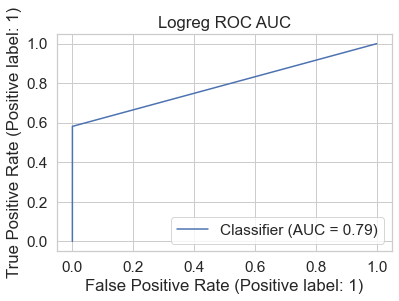

In [15]:
print("logreg score – \n", classification_report(y_test, logreg.predict(X_test)),"\n roc_auc_score: ", 
        roc_auc_score(y_test, logreg.predict(X_test))
)
RocCurveDisplay.from_predictions(y_test, logreg.predict(X_test))
plt.title("Logreg ROC AUC")
plt.show()

**Модель показывает неплохую точность на таргете, но низкую полноту**

knn score – 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.94      0.78      0.85        98

    accuracy                           1.00     56962
   macro avg       0.97      0.89      0.92     56962
weighted avg       1.00      1.00      1.00     56962
 
 roc_auc_score:  0.887711137493827


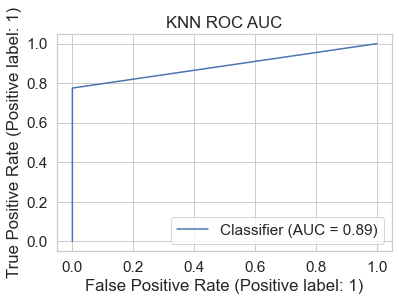

In [16]:
print("knn score – \n", classification_report(y_test, knn.predict(X_test)),"\n roc_auc_score: ", 
        roc_auc_score(y_test, knn.predict(X_test))
)
RocCurveDisplay.from_predictions(y_test, knn.predict(X_test))
plt.title("KNN ROC AUC")
plt.show()


**Хотя алгоритм довольно медленный (по идее из-за дисбаланса классов и большого количества объектов), даже в стоке имеет отличные показатели по всем метрикам**

svm score – 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.86      0.57      0.69        98

    accuracy                           1.00     56962
   macro avg       0.93      0.79      0.84     56962
weighted avg       1.00      1.00      1.00     56962
 
 roc_auc_score:  0.7856351495297049


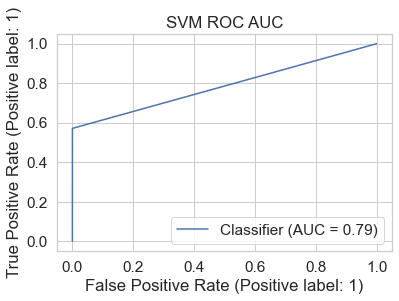

In [17]:
print("svm score – \n", classification_report(y_test, svm.predict(X_test)),"\n roc_auc_score: ", 
        roc_auc_score(y_test, svm.predict(X_test))
)
RocCurveDisplay.from_predictions(y_test, svm.predict(X_test))
plt.title("SVM ROC AUC")
plt.show()

**СВМ имеет результаты сопоставимые с логрегом, ничего необычного**

const_pred score – 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       1.00      0.00      0.00        98

    accuracy                           1.00     56962
   macro avg       1.00      0.50      0.50     56962
weighted avg       1.00      1.00      1.00     56962
 
 roc_auc_score:  0.5


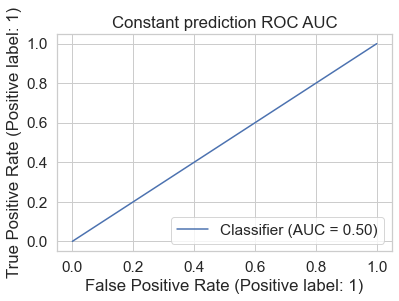

In [18]:
print("const_pred score – \n", classification_report(y_test, const_pred, zero_division=True),"\n roc_auc_score: ", 
        roc_auc_score(y_test, const_pred)
)
RocCurveDisplay.from_predictions(y_test, const_pred)
plt.title("Constant prediction ROC AUC")
plt.show()

**Константа константой, хотя точность в 1.0 улыбает**

### (1 балл) Выберите одну метрику, которую вы будете максимизировать

Представьте, что вы решаете задачу автоматического поиска мошеннических транзакций, чтобы ваш робот автоматически банил пользователей, который их осуществляют.

Обоснуйте свой выбор.

**Поскольку нам важнее вычислить как можно большее количество мошеннических операций, чем быть уверенными в том, что выбранная операция -- фрод (транзакцию всегда можно верифицировать), будем улучшать Recall**

### (2 балла) Переберите гиперпараметры разных моделей, попытайтесь добиться лучшего результата по этой метрике

Постройте график для каждого перебора, сделайте красивый отчет (не надо просто говорить "я решил выбрать 2, 0.7 и 6, так не пойдет".

Можно преобразовывать датасет, преобразовывать, добавлять, удалять фичи, всё что угодно.

Отсутствие результата тоже результат (вдруг вы перебрали кучу вещей, а лучший все еще самый первый запуск, главное что перебрали).

In [19]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

**Переберём уже известные нам по предыдущим домашкам гиперпараметры регуляризации**

In [20]:
def get_linear(model, X, y, svm=False, solver='liblinear', max_iter=3000, scoring='recall_macro'):
    scores = []
    penalty_labels = []
    C_labels = []
    for i in ['l1', 'l2']: # penalty
        for j in [0.001, 0.1, 1, 10, 100, 1000]: # C
            penalty_labels.append(i)
            C_labels.append(j)
            if svm:
                score = cross_val_score(model(dual=False, max_iter=max_iter, penalty=i, C=j), X, y, scoring=scoring).mean()
            else:
                score = cross_val_score(model(solver=solver, max_iter=max_iter, penalty=i, C=j), X, y, scoring=scoring).mean()
            scores.append(score)
    result = {
        'scores': scores,
        'penalty': penalty_labels,
        'C': C_labels
    }
    return result
            

**Поскольку KNN работает долговато с таким количеством данных, переберём только значения distance и n_neighbors без кросс-валидации**

In [21]:
def get_knn_params(model, X_train, X_test, y_train, y_test, scoring=recall_score):
    scores = []
    nn = []
    penalty_labels = []
    for i in [1, 2]: # distance
        for j in [3, 5, 10]: # n_neighbors
            penalty_labels.append(str(i))
            nn.append(j)
            y_pred = model(p=i, n_neighbors=j, leaf_size=400).fit(X_train, y_train).predict(X_test)
            score = scoring(y_test, y_pred, average='macro')
            scores.append(score)
    result = {
        'scores': scores,
        'n_neighbors': nn,
        'distance': penalty_labels
    }
    return result

In [22]:
logregcv = get_linear(LogisticRegression, scaler.fit_transform(X), y)

In [23]:
fig = px.scatter(logregcv, x='C', y='scores', color='penalty', title='LogReg C tuning', trendline="lowess")
fig.show()



In [24]:
svmcv = get_linear(LinearSVC, scaler.fit_transform(X), y, True)

In [25]:

fig = px.scatter(svmcv, x='C', y='scores', color='penalty', title='SVM C tuning', trendline="lowess")
fig.show()

In [26]:
knncv = get_knn_params(KNeighborsClassifier, X_train, X_test, y_train, y_test)

In [27]:
fig = px.scatter(knncv, x='n_neighbors', y='scores', color='distance', title='KNN n_neighbors tuning', trendline="lowess")
fig.show()


**Улучшили показатели всех моделей с помощью перебора простых гиперпараметров, при желании и вычислительных способностях можно прогнать ВСЕ гиперпараметры в GridSearch и получить, возможно, ещё более высокие показатели**

**А теперь попробуем undersampling и разделим датасет на две равные части**

In [28]:
print(len(df[df['Class'] != 0]))

492


In [29]:
newdf = df.sort_values(by='Class', ascending=False)[:492 * 2]
fig = px.pie(newdf, values=newdf.Class.value_counts(), names=["Not fraud", "Fraud"], title="Distribution of undersampled data")
fig.show()

**Попробуем обучить модели на нём**

In [30]:
X, y = newdf.drop('Class', axis=1), newdf.Class

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [31]:
# Гиперпараметры оказались валидны и для нового датасета

logreg_tuned = LogisticRegression(solver='liblinear', max_iter=500, penalty='l2', C=0.1)
knn_tuned = KNeighborsClassifier(p=2, n_neighbors=3)
svm_tuned = LinearSVC(dual=False, max_iter=3000, penalty='l1', C=0.1)

In [32]:
logreg_tuned.fit(X_train, y_train)
knn_tuned.fit(X_train, y_train)
svm_tuned.fit(X_train, y_train)

LinearSVC(C=0.1, dual=False, max_iter=3000, penalty='l1')

tuned logreg score – 
               precision    recall  f1-score   support

           0       0.85      0.98      0.91        98
           1       0.98      0.83      0.90        99

    accuracy                           0.90       197
   macro avg       0.91      0.90      0.90       197
weighted avg       0.91      0.90      0.90       197
 
 roc_auc_score:  0.9039373325087611


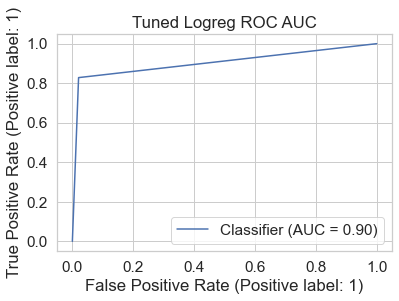

In [33]:
print("tuned logreg score – \n", classification_report(y_test, logreg_tuned.predict(X_test)),"\n roc_auc_score: ", 
        roc_auc_score(y_test, logreg_tuned.predict(X_test))
)
RocCurveDisplay.from_predictions(y_test, logreg_tuned.predict(X_test))
plt.title("Tuned Logreg ROC AUC")
plt.show()

tuned knn score – 
               precision    recall  f1-score   support

           0       0.89      0.98      0.93        98
           1       0.98      0.88      0.93        99

    accuracy                           0.93       197
   macro avg       0.93      0.93      0.93       197
weighted avg       0.93      0.93      0.93       197
 
 roc_auc_score:  0.9291898577612864


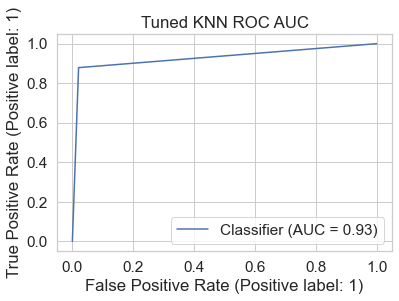

In [34]:
print("tuned knn score – \n", classification_report(y_test, knn_tuned.predict(X_test)),"\n roc_auc_score: ", 
        roc_auc_score(y_test, knn_tuned.predict(X_test))
)
RocCurveDisplay.from_predictions(y_test, knn_tuned.predict(X_test))
plt.title("Tuned KNN ROC AUC")
plt.show()

tuned svm score – 
               precision    recall  f1-score   support

           0       0.89      0.98      0.93        98
           1       0.98      0.88      0.93        99

    accuracy                           0.93       197
   macro avg       0.93      0.93      0.93       197
weighted avg       0.93      0.93      0.93       197
 
 roc_auc_score:  0.9291898577612864


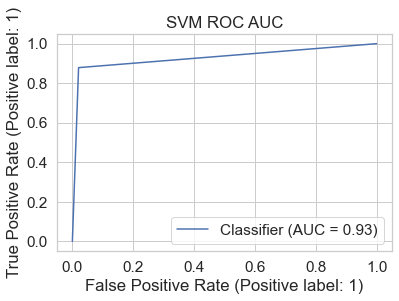

In [35]:
print("tuned svm score – \n", classification_report(y_test, svm_tuned.predict(X_test)),"\n roc_auc_score: ", 
        roc_auc_score(y_test, svm_tuned.predict(X_test))
)
RocCurveDisplay.from_predictions(y_test, svm_tuned.predict(X_test))
plt.title("SVM ROC AUC")
plt.show()

**Итого -- имеем сильно улучшенный результат на нашей целевой метрике, деньги клиента в безопасности (почти)**

# 2 - Небинарная классификация на вашем датасете (суммарно 6 баллов)

### (2 балла) Выберите какой-нибудь интересный вам датасет, скачайте его и считайте данные

Творческое задание - найти в интернете (или собрать свой даже) датасет, сохранить его в файл, и загрузить сюда.

Требования:

- он должен быть немаленький (хотя бы 500 объектов, лучше больше)
- он должен быть интересный
- таргет должен быть небинарным классом

Минус балл, если ваш датасет с кем-нибудь повторится.

**Будем исследовать собранный мной датасет с различными лексико-синтаксическими параметрами произведений и по ним попробуем предсказать их жанр. Я взял книжек с библиотек без авторского права, с ожидаемым перекосом в новомодные "мистические" романы, которые я обозвал триллерами, и достал из них разные дискурсивные маркеры. Названия колонок говорят сами за себя, поэтому подробно описывать каждую не буду**

In [36]:
df = pd.read_csv('GenLib')

In [37]:
df

,Title,Genre,Path,avg_word_len,avg_sent_len,avg_words_per_par,comma_freq,colon_freq,dash_freq,dot_freq,TTR,TTR-root,TTR-log,TTR-corrected,TTR-hdd,TTR-mtld,FKG-oborneva,FRE-oborneva,FKG-soloviev,FRE-soloviev
0,Путешествие из Петербурга в Москву (сборник) -...,Novel,/Users/apotekhin/Documents/books fb2/Novel/Пут...,5.376013,17.123849,17.553258,111.553041,3.783528,0.904601,39.917294,0.253159,84.745904,0.881847,59.924404,0.939010,333.244111,12.121119,47.614338,7.325825,74.809435
1,Вечный зов,Novel,/Users/apotekhin/Documents/books fb2/Novel/Веч...,5.121334,11.202727,27.010564,112.735148,3.793687,36.314805,54.343683,0.148888,76.406043,0.847406,54.027231,0.932290,275.071798,8.175268,62.337961,4.518418,94.805105
2,Козлиная песнь (сборник) - Константин Констант...,Novel,/Users/apotekhin/Documents/books fb2/Novel/Коз...,5.393697,11.366102,14.895986,104.030669,3.946978,0.329365,62.260738,0.232999,88.526340,0.877381,62.597575,0.936346,298.475642,9.110208,55.986993,5.162067,90.402436
3,Страна негодяев - Сергей Александрович Есенин,Novel,/Users/apotekhin/Documents/books fb2/Novel/Стр...,4.800071,8.771858,3.814495,92.751660,3.197399,3.983200,67.335049,0.360363,61.033333,0.900562,43.157084,0.939797,262.832399,5.393212,77.049766,2.571631,108.396117
4,Красный смех (сборник) - Леонид Николаевич Анд...,Novel,/Users/apotekhin/Documents/books fb2/Novel/Кра...,5.022701,14.260389,35.838326,111.103491,7.996708,0.000000,42.822852,0.178284,74.512628,0.857144,52.688385,0.909306,202.785513,9.653024,58.716869,5.584066,87.094889
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
805,Карантин - Скотт Сиглер,Thriller,/Users/apotekhin/Documents/books fb2/Detective...,5.339998,8.508684,20.462418,79.227953,1.998386,37.143921,78.930056,0.179584,64.031811,0.853900,45.277328,0.941905,329.643172,7.334122,62.206983,3.895345,99.450480
806,Дети ночи [litres] - Дэн Симмонс,Thriller,/Users/apotekhin/Documents/books fb2/Detective...,5.348407,11.133497,24.743477,80.849075,2.364563,0.000000,64.608797,0.215208,74.097073,0.868515,52.394543,0.934638,341.459390,8.892794,57.071015,5.009433,91.472251
807,Непогребенный - Чарльз Паллисер,Thriller,/Users/apotekhin/Documents/books fb2/Detective...,5.260550,12.477034,27.367667,93.274544,7.156088,0.000000,53.591501,0.194907,62.013757,0.858116,43.850348,0.925321,296.391385,9.128770,58.451117,5.194343,90.011733
808,Квинканкс,Thriller,/Users/apotekhin/Documents/books fb2/Detective...,5.241607,12.918612,30.684941,92.616377,5.635839,33.339022,51.247968,0.157296,66.569547,0.847085,47.071778,0.926473,278.533074,9.296461,58.218725,5.316613,89.115896


In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 810 entries, 0 to 809
Data columns (total 20 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Title              810 non-null    object 
 1   Genre              810 non-null    object 
 2   Path               810 non-null    object 
 3   avg_word_len       810 non-null    float64
 4   avg_sent_len       810 non-null    float64
 5   avg_words_per_par  810 non-null    float64
 6   comma_freq         810 non-null    float64
 7   colon_freq         810 non-null    float64
 8   dash_freq          810 non-null    float64
 9   dot_freq           810 non-null    float64
 10  TTR                810 non-null    float64
 11  TTR-root           810 non-null    float64
 12  TTR-log            810 non-null    float64
 13  TTR-corrected      810 non-null    float64
 14  TTR-hdd            810 non-null    float64
 15  TTR-mtld           810 non-null    float64
 16  FKG-oborneva       810 non

In [39]:
df.isna().sum()

Title                0
Genre                0
Path                 0
avg_word_len         0
avg_sent_len         0
avg_words_per_par    0
comma_freq           0
colon_freq           0
dash_freq            0
dot_freq             0
TTR                  0
TTR-root             0
TTR-log              0
TTR-corrected        0
TTR-hdd              0
TTR-mtld             0
FKG-oborneva         0
FRE-oborneva         0
FKG-soloviev         0
FRE-soloviev         0
dtype: int64

**Данные не имеют пропущенных значений**

In [40]:
fig = go.Figure(go.Bar(y=df.Genre.index, x=df.Genre.values))
fig.update_traces(marker_line_width = 0)
fig.update_layout(title='Distribution of genres')
fig.show()

**Классы плохо сбалансированы, нельзя использовать долю правильных ответов как целевую метрику**

In [41]:
fig = make_subplots(rows=4, cols=5)

for i in range(17):
    fig.add_trace(go.Box(y=df[f"{df.columns[3:][i]}"], name=df.columns[3:][i]), row=(i // 5) + 1, col=(i % 5) + 1)
fig.update_layout(height=1100)
fig.update_traces(marker_line_width = 0)
fig.update_layout(title='Distribution of numeric features')
fig.show()

**Параметры имеют нормальные распределения, в основном, правда есть выбросы**

**Назначим категориальные метки для целевой переменной**

In [42]:
genres_dict = {
        "Novel": 0,
        "Fiction": 1,
        "Thriller": 2
}

df['Genre'] = df['Genre'].apply(lambda x: genres_dict.get(x))

### (2 балла) Обучите несколько моделей, посмотрите на метрики.
Как модели точно возьмите LogisticRegression, KNN и константу, можете придумать еще какие-нибудь.

Как метрики точно возьмите accuracy, разные усреднения precision, recall и f1.

In [43]:
X = df[df.columns[3:-1]] # В Х передаём числовые признаки
y = df.Genre # В Y закодированный таргет

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [44]:
logreg = LogisticRegression()
knn = KNeighborsClassifier()
svm = LinearSVC(dual=False) # для сходимости
const_pred = np.ones(len(y_test)) * 2 # больший класс

In [45]:
logreg.fit(X_train, y_train)
knn.fit(X_train, y_train)
svm.fit(X_train, y_train)

LinearSVC(dual=False)

In [46]:
print("logreg score – \n", classification_report(y_test, logreg.predict(X_test)))


logreg score – 
               precision    recall  f1-score   support

           0       0.82      0.80      0.81        35
           1       0.91      0.59      0.71        34
           2       0.83      0.95      0.88        93

    accuracy                           0.84       162
   macro avg       0.85      0.78      0.80       162
weighted avg       0.85      0.84      0.83       162



In [47]:
print("svm score – \n", classification_report(y_test, svm.predict(X_test)))

svm score – 
               precision    recall  f1-score   support

           0       0.78      0.80      0.79        35
           1       0.91      0.59      0.71        34
           2       0.84      0.94      0.88        93

    accuracy                           0.83       162
   macro avg       0.84      0.77      0.80       162
weighted avg       0.84      0.83      0.83       162



In [48]:
print("knn score – \n", classification_report(y_test, knn.predict(X_test)))


knn score – 
               precision    recall  f1-score   support

           0       0.93      0.80      0.86        35
           1       0.75      0.35      0.48        34
           2       0.79      0.99      0.88        93

    accuracy                           0.81       162
   macro avg       0.83      0.71      0.74       162
weighted avg       0.81      0.81      0.79       162



In [49]:
print("const_pred score – \n", classification_report(y_test, const_pred, zero_division=True))

const_pred score – 
               precision    recall  f1-score   support

           0       1.00      0.00      0.00        35
           1       1.00      0.00      0.00        34
           2       0.57      1.00      0.73        93

    accuracy                           0.57       162
   macro avg       0.86      0.33      0.24       162
weighted avg       0.76      0.57      0.42       162



**Даже у стоковых моделей неплохой результат, немного страдает полнота у класса фантастики, из-за чего заваливается общий f-1 score. Константа имеет лучший результат на макро точности, что не очень удивительно при дисбалансе классов**

### (2 балла) Выберите метрику, которую вы хотите максимизировать. Переберите гиперпараметры, постарайтесь найти модель, которая максимизирует эту метрику.

Обоснуйте свой выбор. Напишите красивый отчет с графиками. Добились ли вы результатов, которых хотели добиться для этого датасета?

**Поскольку у нас нет предпочтений в точности или полноте определения классов и присутствует ощутимый дисбаланс классов -- будем использовать f1-score**

In [50]:
logregcv = get_linear(LogisticRegression, scaler.fit_transform(X), y, solver="saga", scoring='f1_macro')

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning:

The max_iter was reached which means the coef_ did not converge

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning:

The max_iter was reached which means the coef_ did not converge

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning:

The max_iter was reached which means the coef_ did not converge

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning:

The max_iter was reached which means the coef_ did not converge

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning:

The max_iter was reached which means the coef_ did not converge

/Library/F

In [51]:
fig = px.scatter(logregcv, x='C', y='scores', color='penalty', title='LogReg C tuning', trendline="lowess")
fig.show()

In [52]:
svmcv = get_linear(LinearSVC, scaler.fit_transform(X), y, svm=True, solver="saga", scoring='f1_macro')

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

/Library/Frameworks/Python.framework/Ver

**У линейных моделей проблемы со сходимостью и количество итераций на это слабо влияет**

In [53]:
fig = px.scatter(svmcv, x='C', y='scores', color='penalty', title='SVM C tuning', trendline="lowess")
fig.show()

In [54]:
knncv = get_knn_params(KNeighborsClassifier, X_train, X_test, y_train, y_test, scoring=f1_score)

In [55]:
fig = px.scatter(knncv, x='n_neighbors', y='scores', color='distance', title='KNN n_neighbors tuning', trendline="lowess")
fig.show()

**Результаты удручают, качество упало на всех моделях, возможно, недостаточно гиперпараметров перебрано или кросс-валидация просто напросто дала более честный результат (хотя в кнн результат тоже упал)**

**Ранее мы использовали технику undersampling-а, теперь же попробуем использовать oversampling, а именно SMOTE**

In [56]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=0)
X_train_resampled, y_train_resampled = sm.fit_resample(X_train, y_train)

In [57]:
logreg.fit(X_train_resampled, y_train_resampled)
knn.fit(X_train_resampled, y_train_resampled)
svm.fit(X_train_resampled, y_train_resampled)

LinearSVC(dual=False)

In [58]:
print("logreg score – \n", classification_report(y_test, logreg.predict(X_test)))


logreg score – 
               precision    recall  f1-score   support

           0       0.81      0.83      0.82        35
           1       0.85      0.82      0.84        34
           2       0.90      0.90      0.90        93

    accuracy                           0.87       162
   macro avg       0.85      0.85      0.85       162
weighted avg       0.87      0.87      0.87       162



In [59]:
print("svm score – \n", classification_report(y_test, svm.predict(X_test)))

svm score – 
               precision    recall  f1-score   support

           0       0.71      0.86      0.78        35
           1       0.74      0.82      0.78        34
           2       0.93      0.82      0.87        93

    accuracy                           0.83       162
   macro avg       0.79      0.83      0.81       162
weighted avg       0.84      0.83      0.83       162



In [60]:
print("knn score – \n", classification_report(y_test, knn.predict(X_test)))

knn score – 
               precision    recall  f1-score   support

           0       0.82      0.80      0.81        35
           1       0.62      0.74      0.68        34
           2       0.90      0.85      0.87        93

    accuracy                           0.81       162
   macro avg       0.78      0.79      0.79       162
weighted avg       0.82      0.81      0.82       162



**Мы увеличили показатель целевой метрики на всех моделях с помощью oversampling-a, хотя перебор гиперпараметров не дал желаемого результата**